In [1]:
import load_data

import os

from sklearn.metrics import accuracy_score
from transformers import AutoTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, BertConfig

In [2]:
os.getcwd()

'/opt/ml/code'

In [3]:
# 나름의 전처리가 된 상황
dataset = load_data.load_data("../input/data/train/train.tsv")

In [4]:
MODEL_NAME = "monologg/koelectra-base-v3-discriminator"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [5]:
tokenize_sententce = load_data.tokenized_dataset(dataset, tokenizer)

In [6]:
print(tokenize_sententce.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


In [7]:
concat_entity = []
for e01, e02 in zip(dataset['entity_01'], dataset['entity_02']):
    temp = ''
    temp = e01 + '[SEP]' + e02
    concat_entity.append(temp)

In [8]:
dataset.head()

,sentence,entity_01,entity_02,label
0,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,자동차,17
1,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,27석,0
2,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,UEFA,6
3,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,공격수,2
4,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,퍼쿤 씨 인트라팃,8


In [9]:
concat_entity[:10]

['랜드로버[SEP]자동차',
 '민주당[SEP]27석',
 '유럽 축구 연맹[SEP]UEFA',
 '강수일[SEP]공격수',
 '람캄행[SEP]퍼쿤 씨 인트라팃',
 'OIE[SEP]전문가',
 '기아자동차[SEP]K5',
 '나고야 그램퍼스[SEP]토요타 자동차',
 '조선대학교[SEP]조영주',
 '삼성SDS[SEP]10%']

<br></br>
<br></br>
### Tokenizer

In [10]:
tokenizer.add_special_tokens({'additional_special_tokens': ["[ENT1]", "[ENT2]"]})

2

In [11]:
import pandas as pd
data = pd.read_csv('../input/data/train/train.tsv',sep='\t',header = None)
data

,0,1,2,3,4,5,6,7,8
0,wikipedia-24896-25-30-33-19-21,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작
1,wikipedia-12728-224-5-7-42-44,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음
2,wikipedia-28460-3-0-7-9-12,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭
3,wikipedia-11479-37-24-26-3-5,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함
4,wikipedia-15581-6-0-2-32-40,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님
...,...,...,...,...,...,...,...,...,...
8995,wikipedia-5414-12-15-21-0-4,2002년 FIFA 월드컵 사우디아라비아와의 1차전에서 독일은 8-0으로 승리하였는...,사우디아라비아,15,21,2002년,0,4,관계_없음
8996,wikipedia-10384-4-12-14-0-1,일본의 2대 메이커인 토요타와 닛산은 시장 점유율을 높이기 위한 신차 개발을 계속하...,토요타,12,14,일본,0,1,단체:본사_국가
8997,wikipedia-25913-6-8-10-93-106,방호의의 손자 방덕룡(方德龍)은 1588년(선조 21년) 무과에 급제하고 낙안군수로...,방덕룡,8,10,선무원종공신(宣武原從功臣),93,106,인물:직업/직함
8998,wikitree-12062-15-0-3-46-47,LG전자는 올해 초 국내시장에 출시한 2020년형 ‘LG 그램’ 시리즈를 이달부터 ...,LG전자,0,3,북미,46,47,관계_없음


In [12]:
t = "abcdefghijk"
token = '[asd]'
# pos 1,2 / 5,6
t[3] + '[asd]' + t[4:]

'd[asd]efghijk'

In [14]:
# tokenizer.tokenize()

In [15]:
# tokenizer.add_special_tokens({'entity1': '[asd]'})
tokenizer.additional_special_tokens.append('[asd]')
tokenizer.additional_special_tokens

['[ENT1]', '[ENT2]']

In [16]:
tokenizer.tokenize(concat_entity[1],dataset.sentence[1])
# 맞아요 
# 좋은거 같습니다
# 떠먹여 주시는분
# ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
# 경량화.. .정말 좋으신 분인데 1000번생각하면 맞습니다 ㅋㅋㅋ

# Transformers 가 알아서 다해주는거 같아요 ㅋㅋㅋㅋㅋ


['민주당',
 '[SEP]',
 '27',
 '##석',
 '선거',
 '##에',
 '##서',
 '민주당',
 '##은',
 '해산',
 '전',
 '의석',
 '##인',
 '230',
 '##석',
 '##에',
 '한참',
 '못',
 '미치',
 '##는',
 '57',
 '##석',
 '(',
 '지역구',
 '27',
 '##석',
 ',',
 '비례',
 '##대표',
 '30',
 '##석',
 ')',
 '을',
 '획득',
 '##하',
 '##는',
 '데',
 '그쳤',
 '##다',
 '.']

In [17]:
tokenized_sentences = tokenizer(
  concat_entity,
  list(dataset['sentence']),
  return_tensors="pt",
  padding=True,
  truncation=True,
  max_length=100,
  add_special_tokens=True,
  )

In [18]:
special_token_false = tokenizer(
  concat_entity,
  list(dataset['sentence']),
  return_tensors="pt",
  padding=True,
  truncation=True,
  max_length=100,
  add_special_tokens=False,
  )

In [19]:
tokenizer.tokenize(concat_entity[1],dataset.sentence[1], add_special_tokens=True)

['[CLS]',
 '민주당',
 '[SEP]',
 '27',
 '##석',
 '[SEP]',
 '선거',
 '##에',
 '##서',
 '민주당',
 '##은',
 '해산',
 '전',
 '의석',
 '##인',
 '230',
 '##석',
 '##에',
 '한참',
 '못',
 '미치',
 '##는',
 '57',
 '##석',
 '(',
 '지역구',
 '27',
 '##석',
 ',',
 '비례',
 '##대표',
 '30',
 '##석',
 ')',
 '을',
 '획득',
 '##하',
 '##는',
 '데',
 '그쳤',
 '##다',
 '.',
 '[SEP]']

In [20]:
dataset['tokenized_cnt'] = [len(tokenizer.tokenize(concat_entity[i],dataset.sentence[i]))for i in range(len(dataset))]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


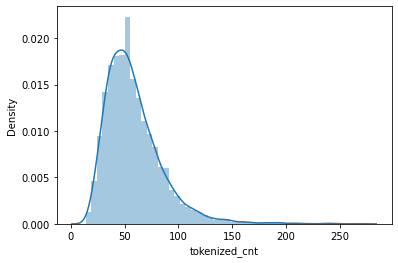

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


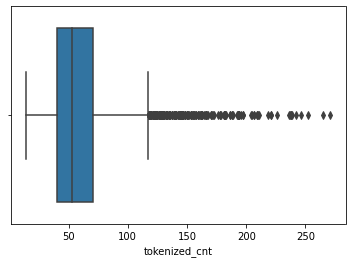

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.distplot(dataset.tokenized_cnt)
plt.show()
sns.boxplot(dataset.tokenized_cnt)
plt.show()

In [22]:
dataset.tokenized_cnt.quantile(q = 0.99)

150.0

In [23]:
sum(dataset.tokenized_cnt > 100)

583

In [31]:
dataset.head()

,sentence,entity_01,entity_02,label,tokenized_cnt
0,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,자동차,17,55
1,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,27석,0,40
2,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,UEFA,6,57
3,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,공격수,2,83
4,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,퍼쿤 씨 인트라팃,8,42


In [38]:
for i in range(len(dataset.loc[dataset.tokenized_cnt > 200].sentence)):
    print(dataset.loc[dataset.tokenized_cnt > 200].sentence.values[i])
    print(dataset.loc[dataset.tokenized_cnt > 200].entity_01.values[i],'|', dataset.loc[dataset.tokenized_cnt > 200].entity_02.values[i], dataset.loc[dataset.tokenized_cnt > 200].label.values[i],)
    print('\n******\n\n')

방송에선, 한국방송공사가 민영 방송인 동양방송(서울본사 및 부산지국), 동아방송, 전일방송, 서해방송, 한국FM을 인수 합병하고, 민영방송 문화방송의 주식 65％를 강제인수함으로써 대한민국 최대의 언론 기관이 됐고, 문화방송은 제휴민영방송사인 춘천문화방송, 원주문화방송, 강릉문화방송(現MBC강원영동 강릉방송국), 삼척문화방송(現MBC강원영동 삼척방송국), 대전문화방송, 청주문화방송, 충주문화방송, 전주문화방송, 광주문화방송, 목포문화방송, 여수문화방송, 대구문화방송, 안동문화방송, 포항문화방송, 부산문화방송, 울산문화방송, 마산문화방송(現MBC경남 창원본부), 진주문화방송(現MBC경남 진주본부), 남양문화방송(現제주문화방송)의 지분의 반 이상(35%)을 문화방송으로 강제 양도 시키고, 한국방송공사에게 자사의 주식 65%가 강제로 넘어가며 법적 공영방송이 되었다.
MBC경남 진주본부 | 문화방송 15

******


[[노르웨이]]의 [[올라프 5세|올라프 왕세자]]와 그의 배우자 [[스웨덴 공주 메르타]], [[룩셈부르크]]의 [[샤를로트 여대공]]와 [[부르봉파르마의 펠릭스]], [[유고슬라비아 왕국]]의 [[:en:Peter II of Yugoslavia|페타르 2세]], [[그리스 왕국]]의 [[요르요스 2세]], [[오스트리아]]의 [[부르봉파르마의 치타]]와 그녀의 자녀들, [[네덜란드]]의 [[빌헬미나 여왕]], 그녀의 자녀 [[율리아나]], 그리고 손녀 [[베아트릭스]]와 [[:en:Princess Margriet of the Netherlands|마르그리트]]는 귀빈의 자격으로 리도 홀에서 머물렀다.
샤를로트 | 부르봉파르마의 펠릭스 0

******


같은 날 있었던 대법원 형사2부는 삼성SDS의 신주인수권부사채(BW)를 헐값으로 발행하면서 이건희 전 회장이 자녀 등에게 최대지분을 사도록 해 회사에 1,540억원의 손실을 입힌 혐의에 대해서는 "제3자에게 인수권을 부여하는 제3자 배정의 방법으로 신주 등을 발행하면서 시가보다 현저하게 낮은 

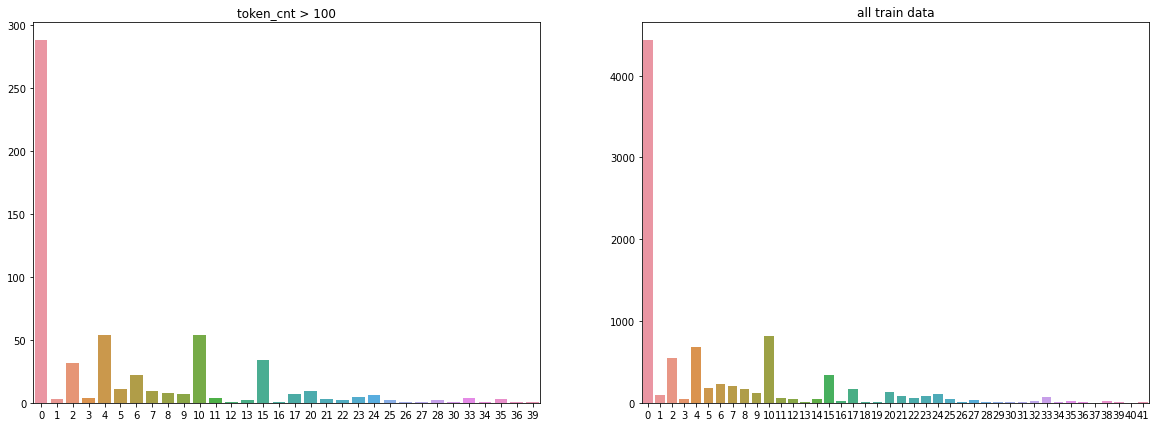

In [27]:
plt.figure( figsize = (20,7))
plt.subplot(1,2,1)
sns.barplot(x = dataset.loc[dataset.tokenized_cnt > 100].label.value_counts().index, y = dataset.loc[dataset.tokenized_cnt > 100].label.value_counts().values )
plt.title('token_cnt > 100')
plt.subplot(1,2,2)
sns.barplot(x = dataset.label.value_counts().index, y = dataset.label.value_counts().values )
plt.title('all train data')
plt.show()

<AxesSubplot:>

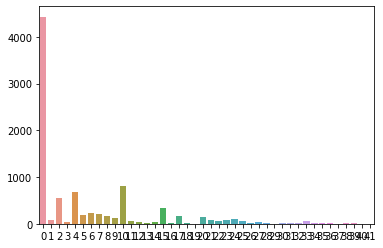

In [28]:
sns.barplot( x = dataset.label.value_counts().index, y = dataset.label.value_counts().values )

In [ ]:
dataset.label.value_counts()

In [ ]:

dat
tokenizer.tokenize( )

In [39]:
t = tokenizer(['앙앙'], [concat_entity[0]])
t

{'input_ids': [[2, 3091, 4493, 3, 10086, 4239, 4505, 3, 6729, 3]], 'token_type_ids': [[0, 0, 0, 0, 1, 1, 1, 1, 1, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

### Model import

In [ ]:
from transformers import ElectraConfig, ElectraForSequenceClassification

In [ ]:
electra_config = ElectraConfig.from_pretrained("monologg/koelectra-base-v3-discriminator")

In [ ]:
electra_config.num_labels = 42

In [ ]:
m = ElectraForSequenceClassification(electra_config)
m

In [ ]:
m.config

In [78]:
model = ElectraForSequenceClassification.from_pretrained("monologg/koelectra-base-v3-discriminator", num_labels = 42)

Some weights of the model checkpoint at monologg/koelectra-base-v3-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: 

In [62]:
model.config

ElectraConfig {
  "_name_or_path": "monologg/koelectra-base-v3-discriminator",
  "architectures": [
    "ElectraForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "summary_activation": "gelu",
  "summary_last_dropout": 0.1,
  "summary_type": "first",
  "summary_use_proj": true,
  "transformers_version": "4.2.0",
  "type_vocab_size": 2,
  "vocab_size": 35000
}

In [70]:
model

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(35000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0): ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [ ]:
from torch.utils.data import DataLoader
from transformers import ElectraTokenizer, ElectraForSequenceClassification



MODEL_NAME = "monologg/koelectra-base-v3-discriminator"
tokenizer = ElectraTokenizer.from_pretrained(MODEL_NAME)
# load test datset
test_dataset_dir = "/opt/ml/input/data/test/test.tsv"
test_dataset, test_label = load_test_dataset(test_dataset_dir, tokenizer)
test_dataset = RE_Dataset(test_dataset ,test_label)


# load my model
model_dir = "./my_BEST/maxlength_200_KoElectra_zero50%/step5500"
MODEL_NAME = model_dir # model dir.
# bert
#model = BertForSequenceClassification.from_pretrained(args.model_dir)
# electra
model = ElectraForSequenceClassification.from_pretrained(model_dir)
# model.parameters
model.to(device)

dataloader = DataLoader(tokenized_sent, batch_size=40, shuffle=False)
model.eval()
output_pred = []
output_logit = np.array([])

for i, data in enumerate(dataloader):
    with torch.no_grad():
        outputs = model(
            input_ids=data['input_ids'].to(device),
            attention_mask=data['attention_mask'].to(device),
            token_type_ids=data['token_type_ids'].to(device)
        )
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    result = np.argmax(logits, axis=-1)

    output_pred.append(result)
    output_logit.append(logits[0])
# print(len(output_logit), len(output_logit[0]))
return np.array(output_pred).flatten(), output_logit